<a href="https://colab.research.google.com/github/DhananjayNair/Insurance_Premium_Predicition/blob/main/Insurance_Predictor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Analysis

In [39]:
insurance_dataset=pd.read_csv('/content/insurance.csv')
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
insurance_dataset.shape


(1338, 7)

In [41]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [42]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


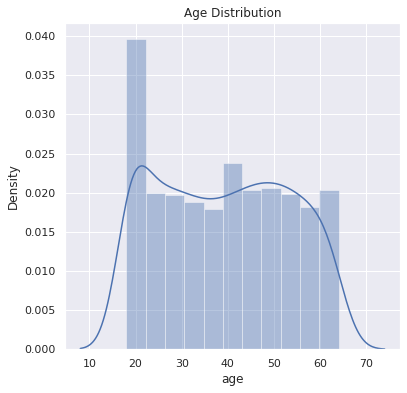

In [43]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

In [44]:
insurance_dataset['sex'].value_counts()
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

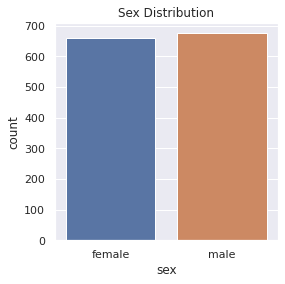

In [45]:
plt.figure(figsize=(4,4))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


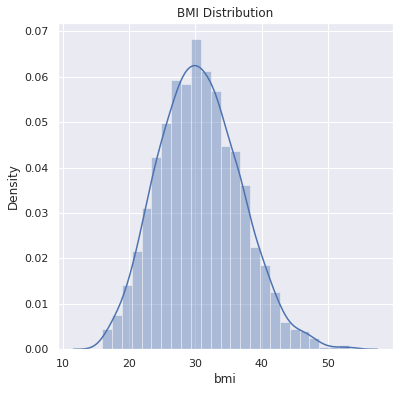

In [46]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

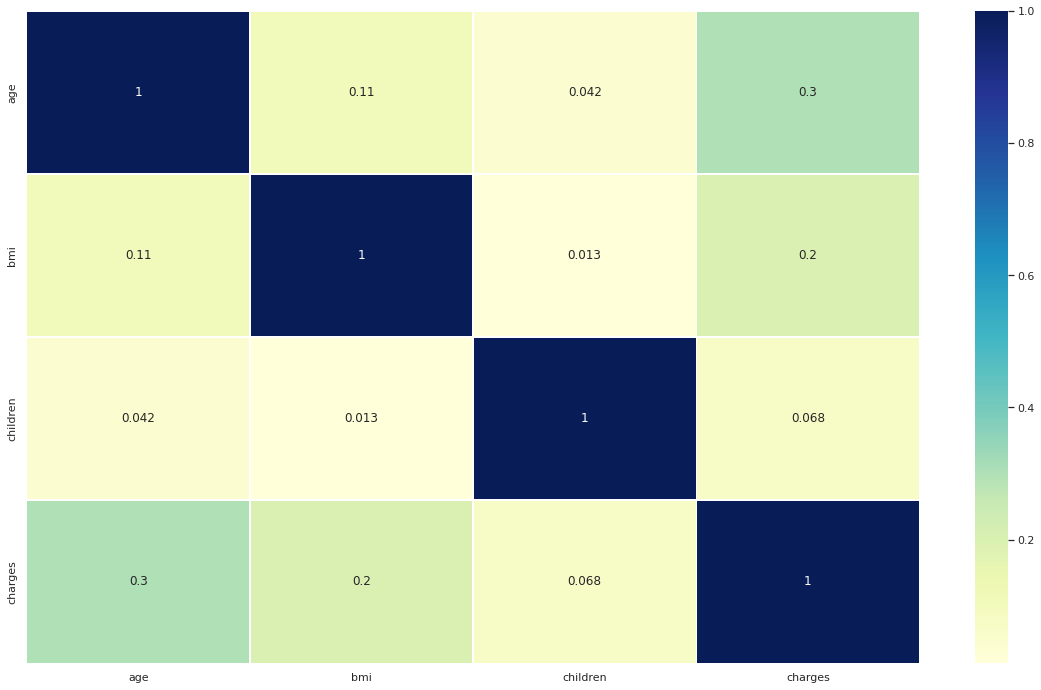

In [47]:
plt.figure(figsize=(20,12))
sns.heatmap(insurance_dataset.corr(), linewidths=.5, annot=True, cmap="YlGnBu")

Roughly we can see that smoking has an higher correlaton with the target 'Charges'.

Data Pre-Processing

In [48]:
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
insurance_dataset.replace({'smoker':{'no':0,'yes':1}},inplace=True)
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)


In [49]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [50]:
X=insurance_dataset.drop(columns='charges',axis=1)
Y=insurance_dataset['charges']
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


Splitting Data into Training Data and Testing Data

In [51]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training

In [52]:
model_1=LinearRegression()


In [53]:
model_1.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [54]:
training_data_prediction=model_1.predict(X_train)

In [55]:
r2_train=metrics.r2_score(Y_train,training_data_prediction)
print(r2_train)

0.751505643411174


In [56]:
testing_data_prediction=model_1.predict(X_test)

In [57]:
r2_test=metrics.r2_score(Y_test,testing_data_prediction)
print(r2_test)

0.7447273869684077


Feature Importnace

In [58]:
from sklearn.inspection import permutation_importance

r = permutation_importance(model_1, X_test, Y_test, n_repeats=2)

fi = dict(zip(insurance_dataset.columns, r.importances_mean))   

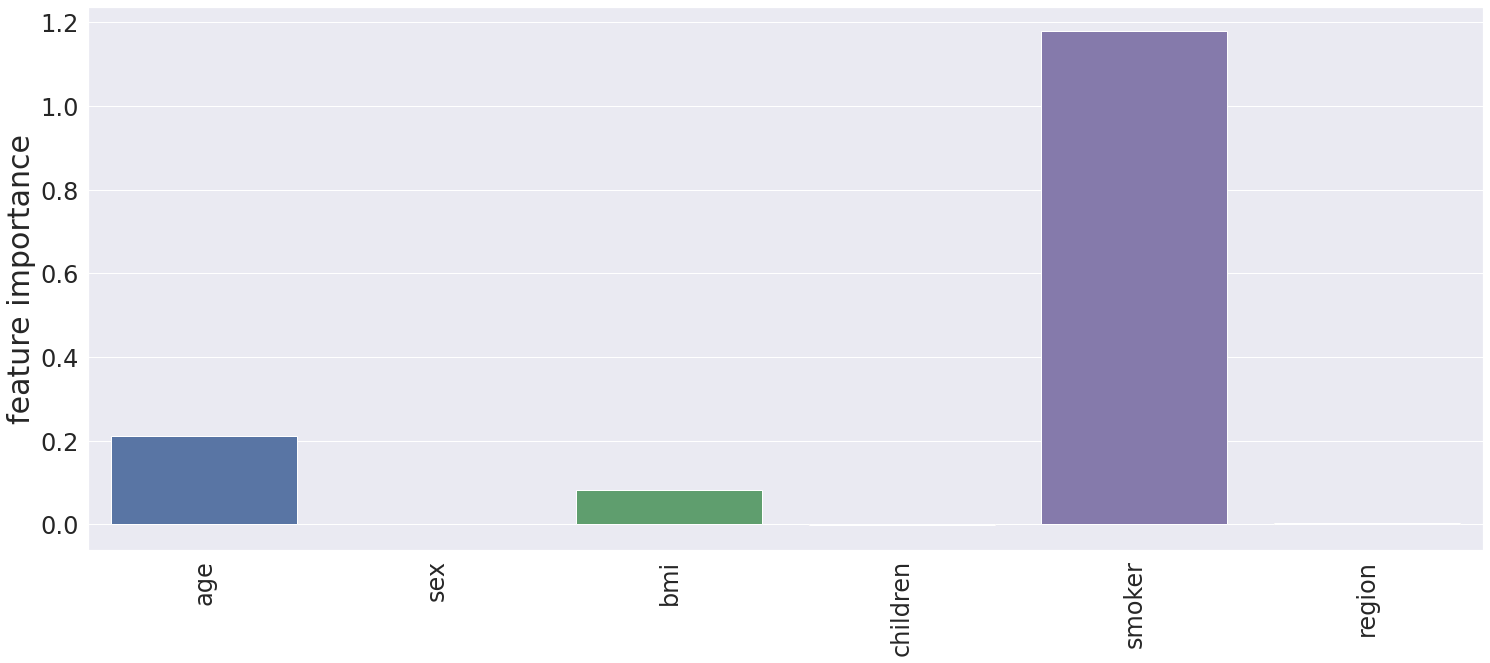

In [59]:
cols = ['age','sex','bmi','children','smoker','region']
new_fi = {k:v for k,v in fi.items() if k in cols}

plt.figure(figsize=(25,10))
sns.barplot(x=list(new_fi.keys()), y=list(new_fi.values()))
plt.xticks(rotation=90, fontsize=24)
plt.yticks(fontsize=24, )
plt.ylabel("feature importance", fontsize=30)
plt.savefig('fig1',transparent=True, bbox_inches='tight')
     
